In [12]:
import numpy as np 
import matplotlib.pyplot as plt

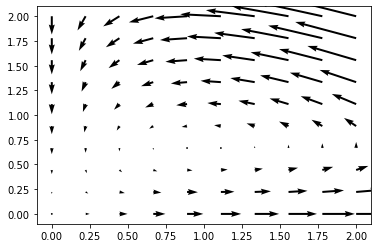

In [1]:
from matplotlib.pyplot import quiver, streamplot
import numpy as np
a = 0.2 
b = 0.3
c = 0.1
d = 0.1
[X,Y] = np.meshgrid([np.linspace(0,2,10)], [np.linspace(0,2,10)])
U = X*(a- b*Y)
V = Y*(-c + d*X)
quiver(X, Y, U, V)

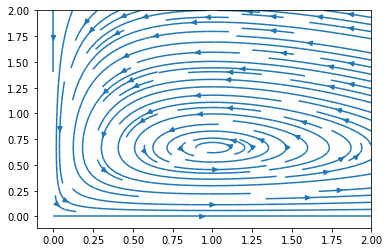

In [23]:
streamplot(X, Y, U, V)

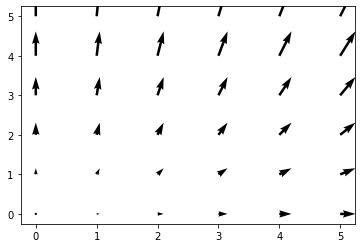

In [13]:
from matplotlib.pyplot import quiver
from numpy import meshgrid
[X,Y] = meshgrid([range (0,6)],[range (0,6)]);
U = 0.25*X;
V = 0.5*Y;
quiver(X,Y,U,V)

In [20]:
print([k for k in range (0,2,0.2)])

TypeError: 'float' object cannot be interpreted as an integer

In [1]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t = [t0 + k*dt for k in range(0, int(floor((tf-t0)/dt)))]
    t.append(tf)
    d = x0.size
    N = len(t)+1
    x = np.zeros((d, len(t)+1))
    x[:0] = x0
    for i, xj in enumerate(x[1:]):
        xj = x[:, i-1] + dt*f(t[i-1], x[:, i-1])
    return t, x

In [2]:
def solve_euler_explicit2(f, x0, dt, t0, tf):
    t = [t0 + k*dt for k in range(0, int(np.floor((tf-t0)/dt)))]
    t.append(tf)
    N = len(t)+1
    d = x0.size
    x = np.zeros((d, N))
    x[:, 0] = x0
    for i in range (1, N):
        x[:, i] = x[:, i-1] + dt*f(t[i-1], x[:, i-1])
    return t, x

In [4]:
#test sur dx/dt = b*x
b=0.1
def f2(t, x):
    return(b*x)

In [6]:
solve_euler_explicit2(f2, np.array([1]), 1, 0, 5)

([0, 1, 2, 3, 4, 5],
 array([[1.      , 1.1     , 1.21    , 1.331   , 1.4641  , 1.61051 ,
         1.771561]]))

In [63]:
#test sur d2x/dt2 = b**2*x
def f1(t, X):
    return np.array([X[1], b**2*X[0]])

In [8]:
solve_euler_explicit2(f1, np.array([0, 1]), 1, 0, 5)

([0, 1, 2, 3, 4, 5],
 array([[0.      , 1.      , 2.      , 3.01    , 4.04    , 5.1001  ,
         6.2006  ],
        [1.      , 1.      , 1.01    , 1.03    , 1.0601  , 1.1005  ,
         1.151501]]))

In [55]:
#Volterra
a = 0.9
b = 0.3
c = 0.6
d = 0.1
def f(t, X):
    return np.array([X[0]*(a-b*X[1]), X[1]*(-c+d*X[0])])

In [34]:
t, X = solve_euler_explicit2(f, np.array([5, 3]), 0.1, 0, 10)
print(t, X)

[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4000000000000001, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9000000000000001, 2.0, 2.1, 2.2, 2.3000000000000003, 2.4000000000000004, 2.5, 2.6, 2.7, 2.8000000000000003, 2.9000000000000004, 3.0, 3.1, 3.2, 3.3000000000000003, 3.4000000000000004, 3.5, 3.6, 3.7, 3.8000000000000003, 3.9000000000000004, 4.0, 4.1000000000000005, 4.2, 4.3, 4.4, 4.5, 4.6000000000000005, 4.7, 4.800000000000001, 4.9, 5.0, 5.1000000000000005, 5.2, 5.300000000000001, 5.4, 5.5, 5.6000000000000005, 5.7, 5.800000000000001, 5.9, 6.0, 6.1000000000000005, 6.2, 6.300000000000001, 6.4, 6.5, 6.6000000000000005, 6.7, 6.800000000000001, 6.9, 7.0, 7.1000000000000005, 7.2, 7.300000000000001, 7.4, 7.5, 7.6000000000000005, 7.7, 7.800000000000001, 7.9, 8.0, 8.1, 8.200000000000001, 8.3, 8.4, 8.5, 8.6, 8.700000000000001, 8.8, 8.9, 9.0, 9.1, 9.200000000000001, 9.3, 9.4, 9.5, 9.600000000000001, 9.700000000000

In [56]:
t, [x1, x2] = solve_euler_explicit2(f, np.array([10, 2]), 0.01, 0, 3)
print(t, x1[1:])

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35000000000000003, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41000000000000003, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47000000000000003, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.6900000000000001, 0.7000000000000001, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.8200000000000001, 0.8300000000000001, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.9400000000000001, 0.9500000000000001, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.1300000000000001, 1.1400000000000001, 1.1500000000000001, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,

[]

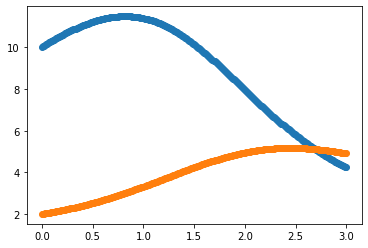

In [57]:
plt.scatter(t, x1[1:])
plt.scatter(t, x2[1:])
plt.plot()

In [71]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    t = [t0 + k*dt for k in range(0, int(np.floor((tf-t0)/dt)))]
    t.append(tf)
    N = len(t)+1
    d = x0.size
    x = np.zeros((d, N-1))
    x[:, 0] = x0
    for i in range (1, N-1):
        print (f(t[i], x[:, i]))
        x[:, i] = x[:, i-1] + dt*f(t[i], x[:, i])
    return t, x

In [72]:
solve_euler_implicit(f2, np.array([1]), 1, 0, 5)

[0.]
[0.]
[0.]
[0.]
[0.]


([0, 1, 2, 3, 4, 5], array([[1., 1., 1., 1., 1., 1.]]))

In [70]:
solve_euler_implicit(f1, np.array([2, 1]), 1, 0, 5)

([0, 1, 2, 3, 4, 5],
 array([[2., 2., 2., 2., 2., 2.],
        [1., 1., 1., 1., 1., 1.]]))